# Support Vector Machine

Support Vector Machine (SVM) is a classification method first described in 1992 by Boser, Guyon, and Vapnik. They are widely used in Natural Language Processing, Bioinformatics and other fields in Machine Learning due to the high accuracy of results and ability to handle large dimensional data. Despite the name, there isn't anything 'Machine-y' about them. Perhaps a more informative name for what this classifier is about would have been 'Max Margin Classifier'.

# A Discriminative Linear Classifier for Two Classes

Let's say we have a classification problem where each observation belongs to exactly one of two classes. A linear discriminative classifier tries identify the "best" hyperplane or decision surface to separate the observations for each class. Once we know how to specify the decision surface, we can then calculate which side of the decision surface our test observation (which we're trying to label) belongs to.

In the figure below, H1, H2 and H3 are all examples of such decision surfaces. This is a 2D example, so the decision surface is a line.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/1024px-Svm_separating_hyperplanes.png" width="400" height="400" />

## Margin in Linearly Separable Data

To understand how a Max Margin Classifier solves the problem of finding the 'best' hyperplane, we must first understand how to define a margin. 

Let $x$ be the feature matrix. Then $x$ has 1 row per observation and 1 column per feature. 
For the training dataset D, the labels are given by the vector $y$.

For a given weight vector $w$, the decision surface is defined by the linear discriminant function:

$$f(w) = w^Tw + b$$

Where $b$ is a bias term that shifts the decision surface away from the origin.

For the moment, let's assume that our training data is linearly separable. Let $x_{+}$ and $x_{-}$ be the points in the two classes closest to the decision surface. Then the margin of f w.r.t. the feature dataset D is:

$$m_{D}(f) = \frac{1}{2} (\hat{w}^Tx_{+} - \hat{w}Tx_{-})$$

Where $\hat{w}$ is a unit vector, i.e. $\hat{w} = \frac {w} {||w||}$

## Maximizing the Margin
Let's also assume that $x_{+}$ and $x_{-}$ are equidistant from $f$. So,

$$\begin{align}
&f(x_{+}) = w^Tx_{+} + b = a\ (some\ constant) \\
&f(x_{-}) = w^Tx_{-} + b = -a
\end{align}$$

To make the geometric margin meaningful we fix the value of the decision function at the points closest to the hyperplane, and set
a = 1. Then the margin function becomes:

$$\begin{align}
&m_{D}(f) = \frac{1}{2} (\hat{w}^Tx_{+} - \hat{w}Tx_{-}) \\
& = \frac {1}{2||w||} (w^Tx_{+} - wTx_{-}) \\
& = \frac {2a}{2||w||} = \frac {1} {||w||} \\
\end{align}$$

We can now frame the problem of finding the decision surface as a constrained optimization problem:

**Maximize $\frac {1} {||w||}$ such that for each $x_i$,**

- **$w^Tx_i + b > 1$, if the class label $y_i$ is label 1.**
- **$w^Tx_i + b < -1$, if the class label $y_i$ is label 2.**

We can combine the two constraints into a single equivalent constraint by making the class labels +1 and -1. . In which case, the constraint becomes 

$y_i(w^Tx_i + b) > 1$.

Maximizing $\frac {1} {||w||}$ is the same as minimizing $||w||^2$. So the optimization problem now becomes (noting that $||w||^2 = w^Tw$):

**Minimize $w^Tw$ such that for each $x_i$, $y_i(w^Tx_i + b) > 1$.**


## Tradeoff Between Margin Size and Mis-classification Rate

So far we've assumed that the data for the two classes are linearly separable. But that's not always the case in real life. In that case, allowing the classifier to mis-classify some observations can lead to a bigger margin. 

<img src="http://i.stack.imgur.com/GbW5S.png" width="400" height="200"/>

To make room for misclassification of some points, we make the margin "soft" by a introducing a slack (or error, or loss) variable $\xi_i (w_i, x_i, y_i)$. The inequality constaint in the optimization problem now becomes $y_iw^Tx_i + b > 1 - \xi_i$, with $\xi_i > 0$. In addition, we also want to control the amount of slack - so we add the sum of all errors to the quantity we want to minimize. The modified optimization problem now is:

**Minimize $w^Tw + C\sum_i \xi_i$ such that for each $x_i$, $y_iw^Tx_i + b > 1- \xi_i$.**

The constant C is a regularization constant. Higher values of C implies lower slack tolerance, and vice-versa.

For a linear SVM, two kinds of loss functions are commonly used:

- L1 Loss: $\xi_i = max(0, 1-(y_iw_i^Tx_i + b))$
- L2 Loss: $\xi_i = [max(0, (1-y_iw_i^Tx_i + b))]^2$

Formulating the loss function this way makes the inequality constraint redundant. So the final formulation is the unconstrained problem:

- L1 SVM: **Minimize $w^Tw + C\sum_i \xi_i$, where $\xi_i = max(0, 1-(y_iw_i^Tx_i + b))$**
- L2 SVM: **Minimize $w^Tw + C\sum_i \xi_i$, where $\xi_i = [max(0, (1-y_iw_i^Tx_i + b))]^2$**

## Dual of the Optimization Problem

Sometimes we also like to consider the Lagrangian Dual of the optimization problem above:

**Maximize $f(\alpha) = \frac {1}{2}\alpha_i^TQ\alpha_i - \sum_i \alpha_i$, subject to the constraint $0 < \alpha_i < U$.**

Reversing the signs of the two terms in $f(x)$ we get:

**Minimize $f(\alpha) = \sum_i \alpha_i - \frac {1}{2}\alpha_i^TQ\alpha_i$, subject to the constraint $0 < \alpha_i < U$.**

- $\alpha$ is related to $w$ by $w_i = \sum_i y_i\alpha_ix_i$
- $Q$ is a matrix such that $Q_{ij} = y_i y_j x_i^T x_j$
- L1 SVM: $U = C$
- L2 SVM: $U = \infty$


## Illustration: L1 SVM for Two Classes in the IRIS Dataset

We'll now build an L1 SVM for two classes ('setosa' and 'versicolor') in the well-known <a href="http://archive.ics.uci.edu/ml/datasets/Iris">IRIS dataset</a>. For optimization, we choose to solve the dual problem using Coordinate Descent described <a href="http://dl.acm.org/citation.cfm?id=1390208">in this paper</a>.

In [13]:
# Imports and data fetch

%matplotlib nbagg
import numpy as np
import pandas as pd
import seaborn as sns

iris_df = sns.load_dataset('iris')
iris_df = iris_df.set_index('species')
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2


In [14]:
iris_df.index.unique()

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')

<IPython.core.display.Javascript object>


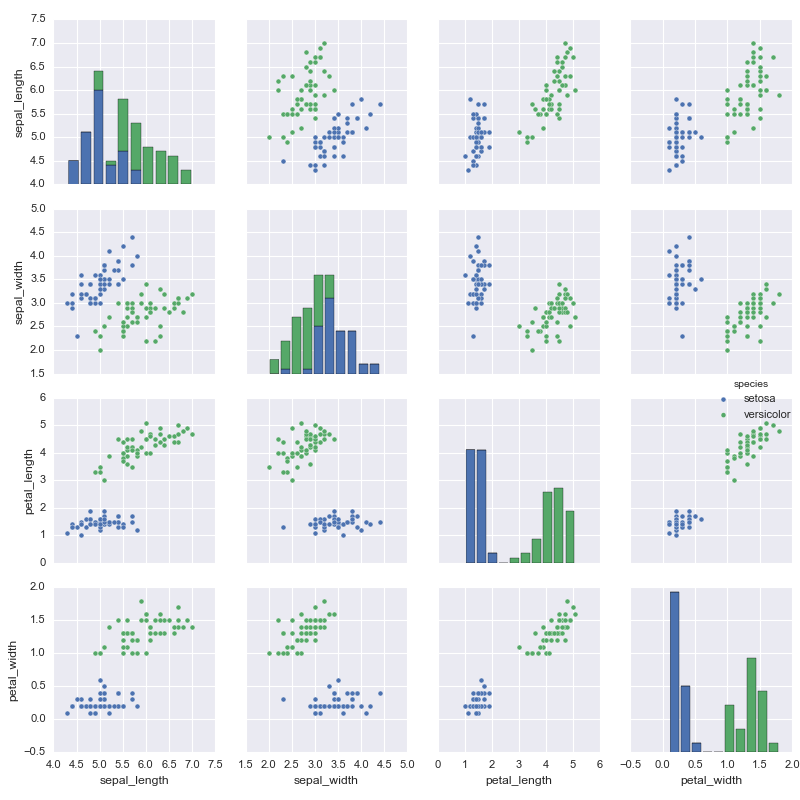

In [15]:
USE_LABELS = ['setosa', 'versicolor']

def label2val(label_or_val, inv=False):    
    # Converts between the class labels and their numerical values.    
    if inv:        
        if label_or_val >= 1.0:
            return 'setosa'
        elif label_or_val <= -1.0:
            return 'versicolor'
        else:
            print('WARN: Unable to classify w^Tx = [%s]' % label_or_val)
            return 'setosa' if label_or_val >= 0 else 'versicolor'
    else:
        if label_or_val == 'setosa':
            return 1.0
        else:
            return -1.0
      
iris_2C = iris_df.loc[USE_LABELS, :]
sns.pairplot(iris_2C.reset_index(), hue='species')

In [16]:
# Set aside 10 observations from each class for testing.

def split_train_test(df, label, n=10):
    label_df = df.loc[label, :]
    test_idx = np.random.randint(0, high=len(label_df)-1, size=n)
    train_idx = {i for i in range(len(label_df))} - {i for i in test_idx}    
    return label_df.ix[train_idx, :], label_df.ix[test_idx, :]

setosa_train, setosa_test = split_train_test(iris_2C, 'setosa')
versicolor_train, versicolor_test = split_train_test(iris_2C, 'versicolor')

total_train = pd.concat([setosa_train, versicolor_train], axis=0)
total_test = pd.concat([setosa_test, versicolor_test], axis=0)

In [17]:
# Code the linear SVM
def linear_svm(X, Y, n_iter=2000, C=1000): 
    # X is 2D: s_samples * n_features
    # Y is 1D: n_samples
    
    U = C # for L1 SVM
    n_samples, n_features = X.shape
    
    assert n_samples == Y.shape[0]
    
    # initialize alpha to zero => w = 0
    alpha, w = np.zeros(n_samples), np.zeros(n_features)
    
    for iter_idx in range(n_iter):
        if iter_idx == 0 or (iter_idx+1)%200 == 0:
            print('Weights before iteration [%s]: %s' % (iter_idx+1, w))
            
        for i in range(n_samples):
            G = y[i]*np.dot(w, x[i]) - 1.0 # D_ii = 0 for L1 SVM
            
            if alpha[i] == 0:
                PG = min(G, 0)
            elif alpha[i] == U:
                PG = max(G, 0)
            elif alpha[i] > 0 and alpha[i] < U:
                PG = G
            
            if PG != 0:
                alpha_i_bar = alpha[i]
                Q_ii = y[i]*y[i] * np.dot(x[i], x[i])
                temp = max(alpha[i] - G/Q_ii, 0)
                alpha[i] = min(temp, U)
                w += (alpha[i] - alpha_i_bar)*y[i]*x[i]
                
    return w
            
x = total_train.as_matrix()
y = total_train.index.map(label2val)
w_opt = linear_svm(x, y)

Weights before iteration [1]: [ 0.  0.  0.  0.]
Weights before iteration [200]: [ 0.09621653  0.68834991 -0.89979406 -0.46563356]
Weights before iteration [400]: [ 0.09608852  0.68864917 -0.89969826 -0.46598147]
Weights before iteration [600]: [ 0.09602198  0.68868156 -0.89958286 -0.4660613 ]
Weights before iteration [800]: [ 0.09599918  0.68869266 -0.89954331 -0.46608866]
Weights before iteration [1000]: [ 0.09599136  0.68869646 -0.89952975 -0.46609804]
Weights before iteration [1200]: [ 0.09598868  0.68869776 -0.89952511 -0.46610125]
Weights before iteration [1400]: [ 0.09598776  0.68869821 -0.89952351 -0.46610235]
Weights before iteration [1600]: [ 0.09598745  0.68869837 -0.89952297 -0.46610273]
Weights before iteration [1800]: [ 0.09598734  0.68869842 -0.89952278 -0.46610286]
Weights before iteration [2000]: [ 0.0959873   0.68869844 -0.89952272 -0.4661029 ]


In [18]:
# Evaluate the test set
def classify_row(w, row):
    prod = np.dot(w, row.as_matrix())
    return label2val(prod, inv=True)

test_results = total_test.apply(lambda row: classify_row(w_opt, row), axis=1)
test_results.name = 'Actual Label'
test_results.index.name = 'Expected Label'

test_results.reset_index()

WARN: Unable to properly classify w^Tx = [%s] 0.70673887079


,Expected Label,Actual Label
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa
5,setosa,setosa
6,setosa,setosa
7,setosa,setosa
8,setosa,setosa
9,setosa,setosa
